In [171]:
import pandas as pd
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.interpolate import griddata
%matplotlib inline
import matplotlib.pyplot as plt

In [157]:
gt = pd.read_csv("error_evaluation/stamped_groundtruth.csv")
traj_est = pd.read_csv("error_evaluation/stamped_traj_estimate.csv")
cols_list = ['timestamp','tx','ty','tz','qx','qy','qz','qw']
gt.columns = cols_list
traj_est.columns = cols_list

In [158]:
# traj_est['timestamp'] *= list(gt['timestamp'])[-1]/list(traj_est['timestamp'])[-1]
traj_est['timestamp'] /= max(traj_est['timestamp'])-min(traj_est['timestamp'])
gt['timestamp'] /= max(gt['timestamp'])-min(gt['timestamp'])

In [159]:
len(gt),len(traj_est)

(1148, 69)

In [175]:
def get_error(col_name,precision=100):
    times = np.linspace(0, 1, precision)
    gt2 = griddata(gt['timestamp'], gt[col_name], times, method='linear', rescale=True)
    traj_est2 = griddata(traj_est['timestamp'], traj_est[col_name], times, method='linear', rescale=True)
    return traj_est2-gt2

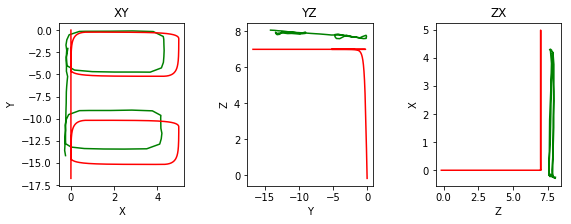

In [185]:
fig = plt.figure(figsize=(9,3))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plt.title("Planar Plots")

plt.subplot(1,3,1)
plt.title("XY")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(traj_est["tx"],traj_est["ty"],'g')
plt.plot(gt["tx"],gt["ty"],'r')

plt.subplot(1,3,2)
plt.title("YZ")
plt.xlabel("Y")
plt.ylabel("Z")
plt.plot(traj_est["ty"],traj_est["tz"],'g')
plt.plot(gt["ty"],gt["tz"],'r')

plt.subplot(1,3,3)
plt.title("ZX")
plt.xlabel("Z")
plt.ylabel("X")
plt.plot(traj_est["tz"],traj_est["tx"],'g')
plt.plot(gt["tz"],gt["tx"],'r')

plt.savefig("error_evaluation/Planar_plots.png")

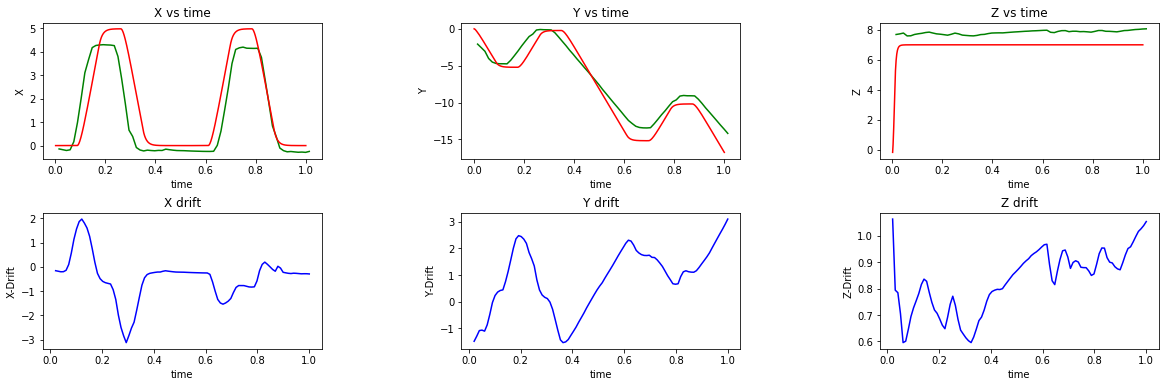

In [186]:
fig = plt.figure(figsize=(20,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.4)
plt.title("Directional Plots/nThese plots are not compensated for time,scale or alignment")

plt.subplot(2,3,1)
plt.title("X vs time")
plt.xlabel("time")
plt.ylabel("X")
plt.plot(traj_est["timestamp"],traj_est["tx"],'g')
plt.plot(gt["timestamp"],gt["tx"],'r')

plt.subplot(2,3,2)
plt.title("Y vs time")
plt.xlabel("time")
plt.ylabel("Y")
plt.plot(traj_est["timestamp"],traj_est["ty"],'g')
plt.plot(gt["timestamp"],gt["ty"],'r')

plt.subplot(2,3,3)
plt.title("Z vs time")
plt.xlabel("time")
plt.ylabel("Z")
plt.plot(traj_est["timestamp"],traj_est["tz"],'g')
plt.plot(gt["timestamp"],gt["tz"],'r')

plt.subplot(2,3,4)
plt.title("X drift")
plt.xlabel("time")
plt.ylabel("X-Drift")
plt.plot(np.linspace(0, 1, 100),get_error('tx'),'b')

plt.subplot(2,3,5)
plt.title("Y drift")
plt.xlabel("time")
plt.ylabel("Y-Drift")
plt.plot(np.linspace(0, 1, 100),get_error('ty'),'b')

plt.subplot(2,3,6)
plt.title("Z drift")
plt.xlabel("time")
plt.ylabel("Z-Drift")
plt.plot(np.linspace(0, 1, 100),get_error('tz'),'b')

plt.savefig("error_evaluation/Directional_plots.png")

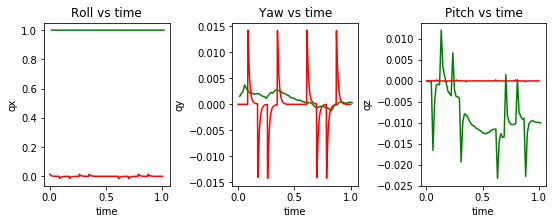

In [181]:
fig = plt.figure(figsize=(9,3))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plt.title("Rotational Plots")

plt.subplot(1,3,1)
plt.title("Roll vs time")
plt.xlabel("time")
plt.ylabel("qx")
plt.plot(traj_est["timestamp"],traj_est["qx"],'g')
plt.plot(gt["timestamp"],gt["qx"],'r')

plt.subplot(1,3,2)
plt.title("Yaw vs time")
plt.xlabel("time")
plt.ylabel("qy")
plt.plot(traj_est["timestamp"],traj_est["qy"],'g')
plt.plot(gt["timestamp"],gt["qy"],'r')

plt.subplot(1,3,3)
plt.title("Pitch vs time")
plt.xlabel("time")
plt.ylabel("qz")
plt.plot(traj_est["timestamp"],traj_est["qz"],'g')
plt.plot(gt["timestamp"],gt["qz"],'r')

In [163]:
traj_est

,timestamp,tx,ty,tz,qx,qy,qz,qw
0,0.014706,-0.143299,-2.078527,7.685468,0.999997,0.001551,-0.000104,0.002028
1,0.029412,-0.176006,-2.559479,7.726834,0.999994,0.002055,-0.000138,0.002671
2,0.044118,-0.208459,-3.053781,7.781684,0.999990,0.002488,-0.000192,0.003785
3,0.058824,-0.180304,-4.026988,7.591005,0.999649,0.003738,-0.016546,0.020353
4,0.073529,0.166170,-4.516247,7.600345,0.999912,0.003068,-0.004974,0.011896
...,...,...,...,...,...,...,...,...
64,0.955882,-0.269614,-11.869929,7.988592,0.999762,0.000209,-0.009647,0.019570
65,0.970588,-0.284593,-12.449118,8.016396,0.999762,0.000239,-0.009819,0.019480
66,0.985294,-0.276979,-13.036219,8.029658,0.999763,0.000383,-0.009883,0.019403
67,1.000000,-0.289331,-13.591818,8.052047,0.999761,0.000399,-0.009861,0.019495


In [164]:
gt.to_csv("error_evaluation/grundtruth.csv",index=None,header=None,sep=' ')
traj_est.to_csv("error_evaluation/traj_est.csv",index=None,header=None,sep=' ')

In [165]:
!cut --delimiter " " --fields 1-8 error_evaluation/grundtruth.csv > clean.tum
!cut --delimiter " " --fields 1-8 error_evaluation/traj_est.csv > clean.tum